In [3]:
import decoupler as dc
import os, sys
# Only needed for visualization:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import anndata as ad
import numpy as np

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
pathway_file = '../pathway_files/K562_DESEq2.gmt'

In [6]:
# process pathway file
symbol_list = []
collection_list = []
geneset_list = []
file = open(pathway_file, 'r')
info = file.readlines()
for line in info:
    line = line.strip().split('\t')
    for gene in line[2:]:
        symbol_list.append(gene)
        collection_list.append('custom')
        geneset_list.append(line[0])
pathway_df = pd.DataFrame()
pathway_df['genesymbol'] = symbol_list
pathway_df['collection'] = collection_list
pathway_df['geneset'] = geneset_list
file.close()

In [7]:
pathway_df

,genesymbol,collection,geneset
0,ENSG00000211459.2,custom,DDX3X
1,ENSG00000130600.11,custom,DDX3X
2,ENSG00000139269.2,custom,DDX3X
3,ENSG00000135069.9,custom,DDX3X
4,ENSG00000151012.9,custom,DDX3X
...,...,...,...
39395,ENSG00000228327.2,custom,CCAR2
39396,ENSG00000163399.11,custom,CCAR2
39397,ENSG00000066557.5,custom,CCAR2
39398,ENSG00000105058.7,custom,CCAR2


In [13]:
# provide contrast level, -log10(p-value) from DESeq2 results
expr_dir = '../data/prerank_DESeq2/'
all_expr_file = os.listdir(expr_dir)
all_expr_file.sort()
result_dict = dict()
for f in all_expr_file:
    if f.endswith('rnk'):
        print(f)
        target = f.split('.')[0]
        data = pd.read_csv(expr_dir+f, delimiter='\t', index_col=0, header=None)
        adata = ad.AnnData(data)
        adata = adata.transpose()
        # break3
        results = dc.run_consensus(mat=adata, net=pathway_df, source='geneset',
                                  target='genesymbol', weight=None, verbose=False, use_raw=False)
        result_dict[target] = adata.obsm['consensus_estimate'].transpose()

AARS.rnk
AATF.rnk
ABCF1.rnk
ADAR.rnk
AGO1.rnk
AKAP1.rnk
AKAP8.rnk
AKAP8L.rnk
APOBEC3C.rnk
ASCC1.rnk
ATP5C1.rnk
AUH.rnk
BCCIP.rnk
BCLAF1.rnk
BOP1.rnk
BUD13.rnk
CCAR1.rnk
CCAR2.rnk
CELF1.rnk
CIRBP.rnk
CKAP4.rnk
CNOT7.rnk
CPSF6.rnk
CPSF7.rnk
CSTF2.rnk
CSTF2T.rnk
DAZAP1.rnk
DDX1.rnk
DDX19B.rnk
DDX24.rnk
DDX27.rnk
DDX28.rnk
DDX3X.rnk
DDX47.rnk
DDX52.rnk
DDX55.rnk
DDX6.rnk
DHX30.rnk
DKC1.rnk
DNAJC2.rnk
DNAJC21.rnk
EEF2.rnk
EFTUD2.rnk
EIF2S1.rnk
EIF2S2.rnk
EIF3D.rnk
EIF3G.rnk
EIF4A3.rnk
EIF4B.rnk
EIF4G1.rnk
EIF4G2.rnk
ESF1.rnk
EWSR1.rnk
EXOSC9.rnk
FAM120A.rnk
FASTKD2.rnk
FIP1L1.rnk
FKBP4.rnk
FMR1.rnk
FTO.rnk
FUBP3.rnk
FUS.rnk
FXR1.rnk
G3BP1.rnk
G3BP2.rnk
GEMIN5.rnk
GPKOW.rnk
GRSF1.rnk
GRWD1.rnk
GTF2F1.rnk
HLTF.rnk
HNRNPA0.rnk
HNRNPA1.rnk
HNRNPA2B1.rnk
HNRNPAB.rnk
HNRNPC.rnk
HNRNPK.rnk
HNRNPL.rnk
HNRNPM.rnk
HNRNPU.rnk
HNRNPUL1.rnk
HSPD1.rnk
IGF2BP2.rnk
IGF2BP3.rnk
ILF2.rnk
ILF3.rnk
KHDRBS1.rnk
KHSRP.rnk
KIF1C.rnk
KRR1.rnk
LARP4.rnk
LARP7.rnk
LIN28B.rnk
LSM11.rnk
MAGOH.rnk
MATR3.rnk
METAP2.rnk


In [14]:
from scipy.stats import rankdata as rnk

In [15]:
# compute the rank for each pathway
rank_dict = dict()
for target in result_dict.keys():
    rank_dict[target] = dict()
    tmp_df = result_dict[target]
    tmp_df['1'] = tmp_df['1']*(-1)
    ranks = rnk(tmp_df['1'])
    rank = ranks[np.argwhere(tmp_df.index==target)[0, 0]]
    print(target, rank)
    rank_dict[target] = rank

AARS 1.0
AATF 2.0
ABCF1 13.0
ADAR 1.0
AGO1 2.0
AKAP1 2.0
AKAP8 5.0
AKAP8L 1.0
APOBEC3C 24.0
ASCC1 1.0
ATP5C1 1.0
AUH 1.0
BCCIP 1.0
BCLAF1 1.0
BOP1 1.0
BUD13 3.0
CCAR1 1.0
CCAR2 1.0
CELF1 1.0
CIRBP 1.0
CKAP4 11.0
CNOT7 1.0
CPSF6 1.0
CPSF7 161.0
CSTF2 69.0
CSTF2T 2.0
DAZAP1 6.0
DDX1 1.0
DDX19B 1.0
DDX24 1.0
DDX27 1.0
DDX28 1.0
DDX3X 1.0
DDX47 59.0
DDX52 1.0
DDX55 98.0
DDX6 1.0
DHX30 42.0
DKC1 29.0
DNAJC2 4.0
DNAJC21 1.0
EEF2 7.0
EFTUD2 1.0
EIF2S1 1.0
EIF2S2 13.0
EIF3D 1.0
EIF3G 1.0
EIF4A3 4.0
EIF4B 1.0
EIF4G1 1.0
EIF4G2 4.0
ESF1 38.0
EWSR1 70.0
EXOSC9 58.0
FAM120A 5.0
FASTKD2 1.0
FIP1L1 1.0
FKBP4 15.0
FMR1 149.0
FTO 1.0
FUBP3 38.0
FUS 1.0
FXR1 5.0
G3BP1 1.0
G3BP2 1.0
GEMIN5 1.0
GPKOW 1.0
GRSF1 1.0
GRWD1 1.0
GTF2F1 1.0
HLTF 15.0
HNRNPA0 1.0
HNRNPA1 1.0
HNRNPA2B1 117.0
HNRNPAB 1.0
HNRNPC 1.0
HNRNPK 1.0
HNRNPL 1.0
HNRNPM 2.0
HNRNPU 1.0
HNRNPUL1 1.0
HSPD1 1.0
IGF2BP2 1.0
IGF2BP3 1.0
ILF2 1.0
ILF3 1.0
KHDRBS1 1.0
KHSRP 1.0
KIF1C 1.0
KRR1 40.0
LARP4 1.0
LARP7 13.0
LIN28B 1.0
LSM11 13.0
MAGOH 2

In [21]:
# save the results in format
# target_name \t rank
pd.DataFrame.from_dict(rank_dict, orient='index').to_csv('../example_results/decoupler_result.txt', header=None, sep='\t')

In [25]:
# plot the results
result_df = pd.read_csv('../example_results/decoupler_result.txt', header=None, sep='\t', index_col=0)
result_df.columns = ['Correct pathway rank']

In [26]:
def apk(predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the average precision at k between two lists of items.
    """
    total_num = len(predicted)
    precision_list = []
    for idx in range(k):
        precision_list.append(np.where(predicted<=idx+1)[0].shape[0]/total_num)
        # print(np.where(predicted<=idx+1)[0].shape[0])
    # return P@10 and AP@10
    return precision_list[-1], np.mean(precision_list)

Median rank:  2.0
Precision@10:  0.8
Average Precision@10:  0.73


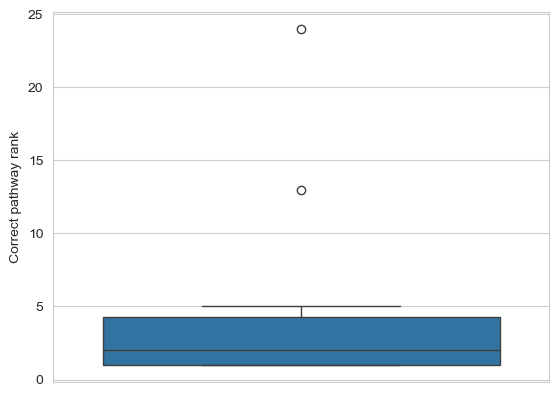

In [27]:
sns.boxplot(data=result_df['Correct pathway rank'])
print('Median rank: ', result_df['Correct pathway rank'].median())
print('Precision@10: ', apk(result_df['Correct pathway rank'])[0])
print('Average Precision@10: ', apk(result_df['Correct pathway rank'])[1])

<AxesSubplot: xlabel='Correct pathway rank', ylabel='Percent'>

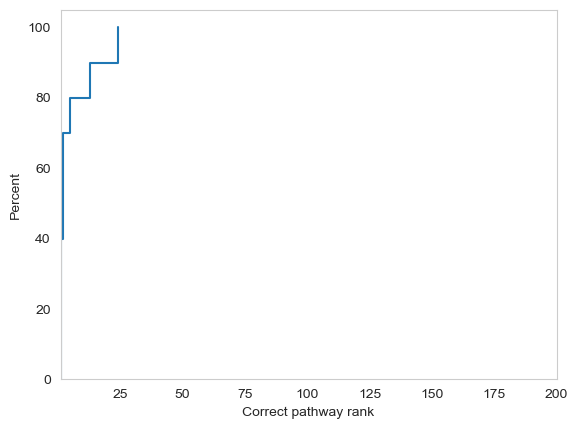

In [30]:
plt.grid(False)
plt.xlim(1, 200)
# plt.ylim(0, 100)
sns.ecdfplot(data=result_df['Correct pathway rank'], stat='percent')